ETL del archivo yellowtaxis_final.csv

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [85]:
# Crear un dataframe con la codificación de RateCodeID

datos_RateCodeID = {
    "RateCodeID": [1, 2, 3, 4, 5, 6],
    "RateCodeDescription": ["Standard rate", "JFK", "Newark", "Nassau or Westchester", "Negotiated fare", "Group ride"]
}

RateCodeID = pd.DataFrame(datos_RateCodeID)

In [86]:
# Crear un dataframe con la codificación de RateCodeID

data_Payment_type = {
    "Payment_type": [1, 2, 3, 4, 5, 6],
    "Payment_description": ["Credit card", "Cash", "No charge", "Dispute", "Unknown", "Voided trip"]
}

# Crear el DataFrame
Payment_Type = pd.DataFrame(data_Payment_type)

In [87]:
Payment_Type

,Payment_type,Payment_description
0,1,Credit card
1,2,Cash
2,3,No charge
3,4,Dispute
4,5,Unknown
5,6,Voided trip


In [2]:
path = "Data/yellowtaxis_final.csv"

data = pd.read_csv(path)

In [89]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')

In [3]:
yellow_taxis = data.copy()

In [4]:
# Convertir las columnas en tipo de dato str a fecha y hora

yellow_taxis["tpep_pickup_datetime"] = pd.to_datetime(yellow_taxis["tpep_pickup_datetime"], format='%Y-%m-%d %H:%M:%S')
yellow_taxis["tpep_dropoff_datetime"] = pd.to_datetime(yellow_taxis["tpep_dropoff_datetime"], format='%Y-%m-%d %H:%M:%S')

In [5]:
yellow_taxis["trip_datatime"] = yellow_taxis["tpep_dropoff_datetime"] - yellow_taxis["tpep_pickup_datetime"]

In [93]:
col = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID']

df_outliers = yellow_taxis[col]

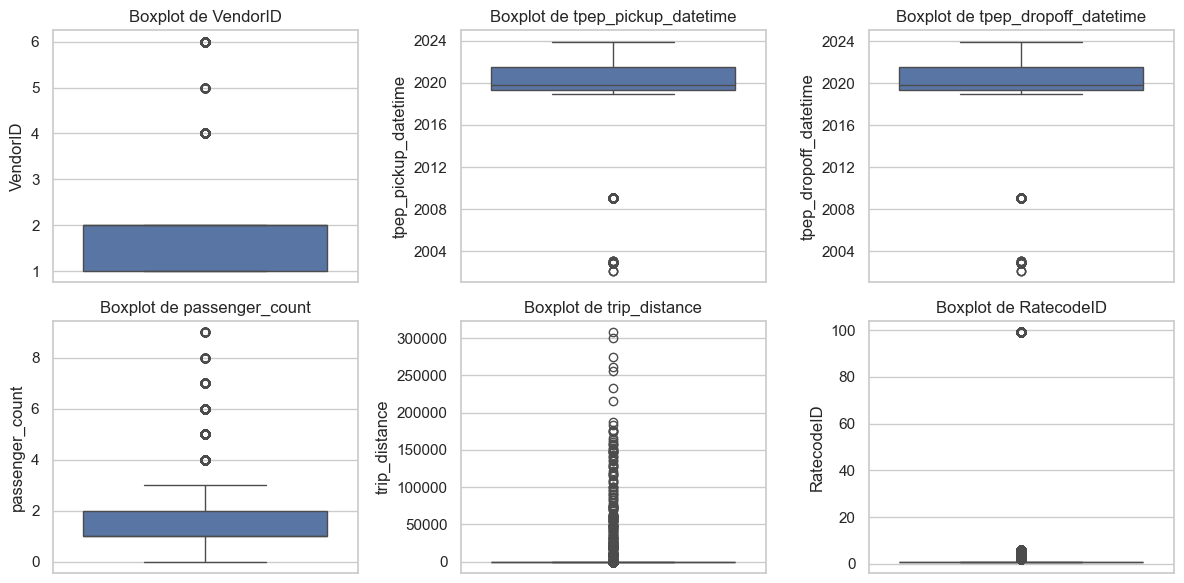

In [94]:
plt.figure(figsize=(12, 6))
# Graficar boxplot para las columnas
for i, column in enumerate(df_outliers.columns):
    plt.subplot(2, 3, i+1)  
    sns.boxplot(df_outliers[column])  
    plt.title(f'Boxplot de {column}')  

plt.tight_layout()
plt.show()  


In [95]:
col2 = ['store_and_fwd_flag', 'PULocationID', 'DOLocationID']

df_outliers2 = yellow_taxis[col2]

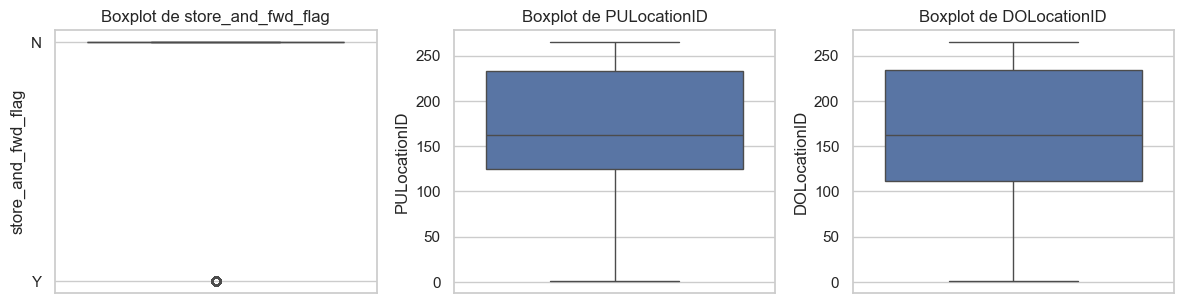

In [96]:

plt.figure(figsize=(12, 6))
# Graficar boxplot para las columnas
for i, column in enumerate(df_outliers2.columns):
    plt.subplot(2, 3, i+1)  
    sns.boxplot(df_outliers2[column])  
    plt.title(f'Boxplot de {column}')  

plt.tight_layout()
plt.show()  

In [6]:
col3 = ['payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount']

df_outliers3 = yellow_taxis[col3]

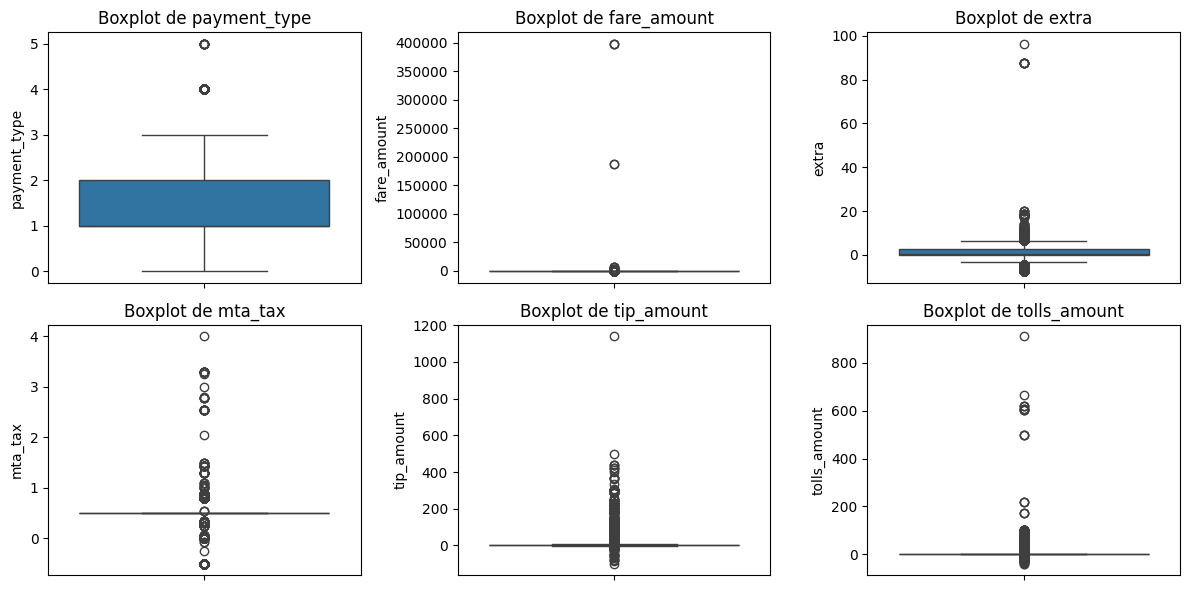

In [7]:
plt.figure(figsize=(12, 6))
# Graficar boxplot para las columnas
for i, column in enumerate(df_outliers3.columns):
    plt.subplot(2, 3, i+1)  
    sns.boxplot(df_outliers3[column])  
    plt.title(f'Boxplot de {column}')  

plt.tight_layout()
plt.show()  

In [ ]:
col4 = ['congestion_surcharge', 'total_amount']

df_outliers4 = yellow_taxis[col4]

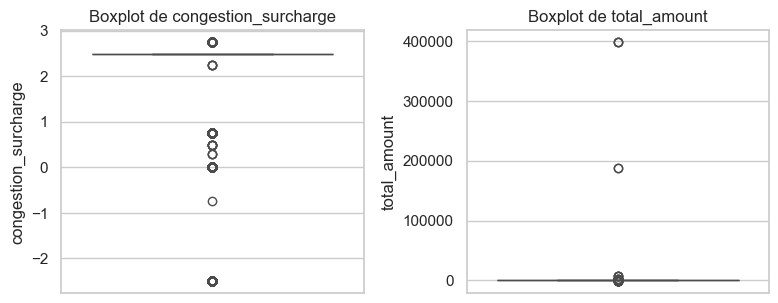

In [ ]:
plt.figure(figsize=(12, 6))
# Graficar boxplot para las columnas
for i, column in enumerate(df_outliers4.columns):
    plt.subplot(2, 3, i+1)  
    sns.boxplot(df_outliers4[column])  
    plt.title(f'Boxplot de {column}')  

plt.tight_layout()
plt.show()  

## Ver que hacer con cada columna, en caso de que haya outliers

Eliminarlos, avisarlos, excluirlos, ver en cada caso que corresponde

Columna VendorID <br>
Segun el diccionario no existen ID mayor a 2

In [ ]:
# Filtrar el DataFrame para las filas donde el valor en la columna "VendorID" sea mayor que 2
vendor_id_mayor_2 = yellow_taxis[yellow_taxis["VendorID"] > 2]

vendor_id_mayor_2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,trip_datatime
180,4,2019-04-01 13:38:27,2019-04-01 13:50:19,1.0,1.60,1.0,N,239,163,1,...,0.0,0.5,2.66,0.0,0.3,15.96,2.5,NaN,NaN,0 days 00:11:52
223,4,2019-04-27 00:12:25,2019-04-27 00:16:27,1.0,0.50,1.0,N,186,164,1,...,0.5,0.5,1.66,0.0,0.3,9.96,2.5,NaN,NaN,0 days 00:04:02
359,4,2019-04-25 08:30:44,2019-04-25 08:40:37,1.0,1.26,1.0,N,234,186,2,...,0.0,0.5,0.00,0.0,0.3,11.30,2.5,NaN,NaN,0 days 00:09:53
561,4,2019-04-08 16:58:10,2019-04-08 17:18:56,1.0,2.57,1.0,N,236,163,1,...,1.0,0.5,2.00,0.0,0.3,21.30,2.5,NaN,NaN,0 days 00:20:46
699,4,2019-04-17 21:46:31,2019-04-17 21:57:08,1.0,2.12,1.0,N,125,107,1,...,0.5,0.5,1.00,0.0,0.3,14.30,2.5,NaN,NaN,0 days 00:10:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19331149,6,2023-09-01 12:09:38,2023-09-01 13:09:27,NaN,9.16,NaN,NaN,265,226,0,...,0.0,0.5,0.00,0.0,0.3,35.82,NaN,NaN,NaN,0 days 00:59:49
19342936,6,2023-09-21 16:09:56,2023-09-21 17:09:16,NaN,3.35,NaN,NaN,265,232,0,...,0.0,0.5,0.00,0.0,0.3,27.39,NaN,NaN,NaN,0 days 00:59:20
19344253,6,2023-09-13 11:09:40,2023-09-13 11:09:46,NaN,5.76,NaN,NaN,265,61,0,...,0.0,0.5,0.00,0.0,0.3,31.02,NaN,NaN,NaN,0 days 00:00:06
19346224,6,2023-09-19 13:09:06,2023-09-19 13:09:53,NaN,5.59,NaN,NaN,265,75,0,...,0.0,0.5,0.00,0.0,0.3,33.00,NaN,NaN,NaN,0 days 00:00:47


Hay 52.335 Filas, lo cuale parece muchos datos, y no me parece una columna que sea de mucha importancia para el analsis. <br>
Decidi dejar esos datos! <br>
No hay nulos

----

Columna tpep_pickup_datetime <br>
Elimino los campos que son menor al año 2019

In [8]:
# Filtrar los campos donde el año sea menor a 2019 y eliminar esas filas del DataFrame
yellow_taxis = yellow_taxis[yellow_taxis["tpep_pickup_datetime"].dt.year >= 2019]

Columna tpep_dropoff_datetime <br>
Elimino los campos que son menor al año 2019

In [9]:
# Filtrar los campos donde el año sea menor a 2019 y eliminar esas filas del DataFrame
yellow_taxis = yellow_taxis[yellow_taxis["tpep_dropoff_datetime"].dt.year >= 2019]

Columna passenger_count <br>
Hay muchos viajes con mas de 4 pasajeros, seran los vehiculos tipo SUV o parecidos con mas capacidad

In [ ]:
numero_pasajeros = yellow_taxis[yellow_taxis["passenger_count"] > 4]
numero_pasajeros

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,trip_datatime
6,2,2019-04-26 20:19:20,2019-04-26 20:43:10,5.0,5.93,1.0,N,237,148,1,...,0.5,0.5,2.73,0.0,0.3,27.53,2.5,NaN,NaN,0 days 00:23:50
7,2,2019-04-13 20:17:37,2019-04-13 20:31:23,5.0,2.35,1.0,N,163,238,2,...,0.5,0.5,0.00,0.0,0.3,14.80,2.5,NaN,NaN,0 days 00:13:46
17,2,2019-04-11 17:44:06,2019-04-11 18:45:55,5.0,20.04,2.0,N,161,132,1,...,4.5,0.5,11.96,0.0,0.3,71.76,2.5,NaN,NaN,0 days 01:01:49
52,2,2019-04-08 11:17:32,2019-04-08 11:44:21,5.0,2.77,1.0,N,161,246,2,...,0.0,0.5,0.00,0.0,0.3,20.80,2.5,NaN,NaN,0 days 00:26:49
72,2,2019-04-25 21:53:32,2019-04-25 22:10:12,5.0,1.99,1.0,N,161,107,1,...,0.5,0.5,3.06,0.0,0.3,18.36,2.5,NaN,NaN,0 days 00:16:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19366914,2,2023-09-08 08:54:15,2023-09-08 08:56:11,5.0,0.32,1.0,N,161,161,2,...,0.0,0.5,0.00,0.0,1.0,8.40,2.5,NaN,0.0,0 days 00:01:56
19366976,2,2023-09-03 16:07:26,2023-09-03 16:16:30,6.0,4.28,1.0,N,48,166,1,...,0.0,0.5,4.48,0.0,1.0,26.88,2.5,NaN,0.0,0 days 00:09:04
19366989,2,2023-09-28 12:45:09,2023-09-28 13:16:53,5.0,4.67,1.0,N,239,113,1,...,0.0,0.5,2.00,0.0,1.0,36.30,2.5,NaN,0.0,0 days 00:31:44
19367000,2,2023-09-09 21:55:12,2023-09-09 22:02:23,5.0,1.09,1.0,N,137,79,1,...,1.0,0.5,2.72,0.0,1.0,16.32,2.5,NaN,0.0,0 days 00:07:11


In [ ]:
# Verificar si hay valores nulos en la columna 'trip_distance'
null_values = yellow_taxis['passenger_count'].isnull().sum()
null_values

312514

In [ ]:
# Filtrar el DataFrame para mostrar solo las filas con valores nulos en la columna 'trip_distance'
null_trip_distance = yellow_taxis[yellow_taxis['passenger_count'].isnull()]

In [10]:
# Eliminar filas con valores nulos en la columna 'passenger_count'
yellow_taxis = yellow_taxis.dropna(subset=['passenger_count'])

In [ ]:
numero_pasajeros_0 = yellow_taxis[yellow_taxis["passenger_count"] == 0]
numero_pasajeros_0

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,trip_datatime
50,1,2019-04-03 17:38:10,2019-04-03 17:55:32,0.0,2.8,1.0,N,161,79,1,...,3.5,0.5,3.45,0.0,0.3,20.75,2.5,NaN,NaN,0 days 00:17:22
92,1,2019-04-05 15:10:15,2019-04-05 15:24:43,0.0,1.1,1.0,N,234,186,1,...,2.5,0.5,0.00,0.0,0.3,13.30,2.5,NaN,NaN,0 days 00:14:28
155,1,2019-04-20 21:13:04,2019-04-20 21:33:53,0.0,8.0,1.0,N,236,231,1,...,3.0,0.5,5.75,0.0,0.3,34.55,2.5,NaN,NaN,0 days 00:20:49
233,1,2019-04-03 18:02:43,2019-04-03 18:13:56,0.0,1.2,1.0,N,236,237,1,...,3.5,0.5,2.56,0.0,0.3,15.36,2.5,NaN,NaN,0 days 00:11:13
312,1,2019-04-17 11:11:31,2019-04-17 11:33:21,0.0,1.3,1.0,N,170,163,1,...,2.5,0.5,2.50,0.0,0.3,19.30,2.5,NaN,NaN,0 days 00:21:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19366742,1,2023-09-20 10:37:02,2023-09-20 11:13:00,0.0,1.7,1.0,N,237,161,1,...,2.5,0.5,6.55,0.0,1.0,39.45,2.5,NaN,0.0,0 days 00:35:58
19366789,1,2023-09-09 20:52:45,2023-09-09 21:12:15,0.0,2.9,1.0,Y,234,87,1,...,3.5,0.5,4.80,0.0,1.0,28.90,2.5,NaN,0.0,0 days 00:19:30
19366962,1,2023-09-01 20:35:56,2023-09-01 20:52:00,0.0,2.2,1.0,N,144,234,1,...,3.5,0.5,3.20,0.0,1.0,24.50,2.5,NaN,0.0,0 days 00:16:04
19367021,1,2023-09-30 18:39:13,2023-09-30 18:57:16,0.0,2.4,1.0,N,237,234,1,...,2.5,0.5,5.00,0.0,1.0,24.60,2.5,NaN,0.0,0 days 00:18:03


Hay pasajeros igual a CERO, no tiene sentido

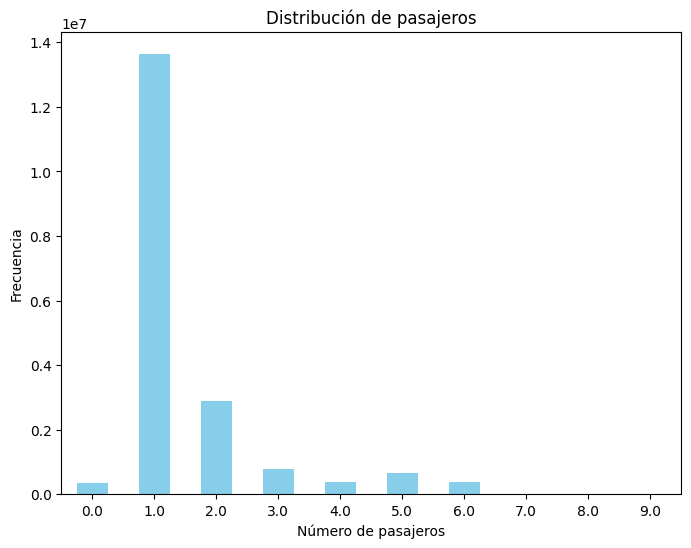

In [ ]:
# Graficar la distribución de la columna 'passenger_count'
plt.figure(figsize=(8, 6))
yellow_taxis['passenger_count'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de pasajeros')
plt.xlabel('Número de pasajeros')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

Les asigno valores a esos valores 0

In [11]:
# Convertir 0s a NaNs en la columna 'passenger_count' utilizando .loc[]
yellow_taxis.loc[yellow_taxis['passenger_count'] == 0, 'passenger_count'] = np.nan

In [12]:
# Interpolar valores nulos en la columna 'passenger_count'
yellow_taxis.loc[:, 'passenger_count'] = yellow_taxis['passenger_count'].interpolate(method='linear')

# Convertir la columna 'passenger_count' a tipo entero
yellow_taxis['passenger_count'] = yellow_taxis['passenger_count'].astype(int)


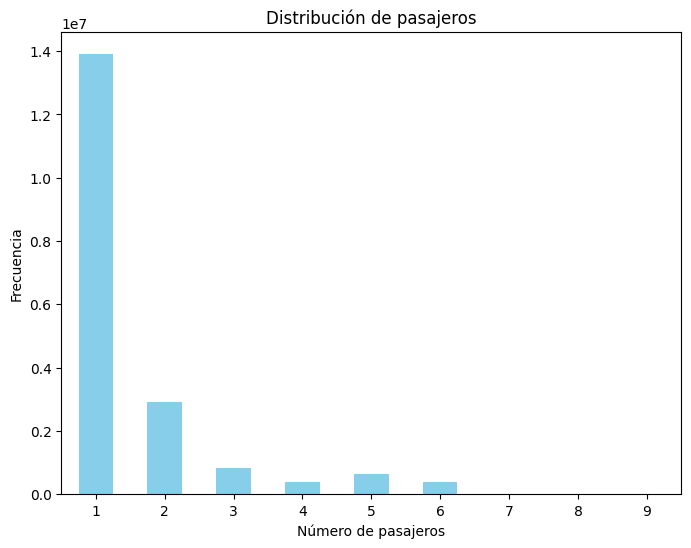

In [ ]:
# Graficar la distribución de la columna 'passenger_count'
plt.figure(figsize=(8, 6))
yellow_taxis['passenger_count'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de pasajeros')
plt.xlabel('Número de pasajeros')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

Columna trip_distance

In [ ]:
# Verificar si hay valores nulos en la columna 'trip_distance'
null_values = yellow_taxis['trip_distance'].isnull().sum()
null_values

0

Columna RateCode ID

In [ ]:
# Verificar si hay valores nulos en la columna 'trip_distance'
null_values = yellow_taxis['RatecodeID'].isnull().sum()
null_values

0

In [ ]:
ratecode = yellow_taxis[yellow_taxis["RatecodeID"] > 6]
ratecode

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,trip_datatime
3169,2,2019-04-29 11:19:04,2019-04-29 11:21:43,1,0.41,99.0,N,238,238,2,...,0.0,0.5,0.0,0.00,0.3,7.30,2.5,NaN,NaN,0 days 00:02:39
100402,2,2019-04-18 14:36:03,2019-04-18 14:38:14,1,0.00,99.0,N,193,193,2,...,0.8,0.5,0.0,0.00,0.0,3.80,0.0,NaN,NaN,0 days 00:02:11
125469,1,2019-04-17 12:17:27,2019-04-17 12:17:27,1,0.00,99.0,N,264,264,1,...,0.0,0.0,0.0,0.00,0.0,110.44,0.0,NaN,NaN,0 days 00:00:00
133381,2,2019-04-14 09:29:55,2019-04-14 09:40:09,3,1.25,99.0,N,50,230,2,...,0.0,0.5,0.0,0.00,0.3,10.30,2.5,NaN,NaN,0 days 00:10:14
138649,1,2019-04-01 16:24:42,2019-04-01 16:24:42,1,0.00,99.0,N,264,264,1,...,0.0,0.0,0.0,0.00,0.0,25.80,0.0,NaN,NaN,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19366520,1,2023-09-29 08:49:59,2023-09-29 10:04:16,1,17.60,99.0,N,19,238,1,...,0.0,0.5,0.0,13.88,1.0,66.88,0.0,NaN,0.0,0 days 01:14:17
19366541,1,2023-09-21 04:20:08,2023-09-21 04:45:35,1,8.10,99.0,N,168,68,1,...,0.0,0.5,0.0,0.00,1.0,33.00,0.0,NaN,0.0,0 days 00:25:27
19366553,1,2023-09-12 11:16:19,2023-09-12 11:59:48,1,6.00,99.0,N,68,74,1,...,0.0,0.5,0.0,0.00,1.0,40.00,0.0,NaN,0.0,0 days 00:43:29
19366625,1,2023-09-06 13:51:50,2023-09-06 14:26:14,1,3.10,99.0,N,56,129,1,...,0.0,0.5,0.0,0.00,1.0,22.00,0.0,NaN,0.0,0 days 00:34:24


Hay datos que no se identifican con ninguno del diccionario!

Columna store_and_fwd_flag <br>
Se elimina por poco utilidad

In [13]:
yellow_taxis.drop('store_and_fwd_flag', axis=1, inplace=True)

Columna Fare amount <br> Tiene outliers menores a 0 y algunos valores muy altos

In [ ]:
fare_amount = yellow_taxis.copy()

In [ ]:
# Contar los campos menores a cero en la columna 'fare_amount'
menor_cero = fare_amount[fare_amount['fare_amount'] < 0]
cantidad_menor_cero = len(menor_cero)

# Contar los campos mayores a 500 en la columna 'fare_amount'
mayor = fare_amount[fare_amount['fare_amount'] > 600]
cantidad_mayor = len(mayor)

print("Cantidad de campos menores a cero:", cantidad_menor_cero)
print("Cantidad de campos mayores a 600:", cantidad_mayor)

Cantidad de campos menores a cero: 68435
Cantidad de campos mayores a 600: 50


In [ ]:
# Filtrar los datos menores a cero y mayores a 500
datos_extremos = fare_amount[(fare_amount['fare_amount'] < 0)]

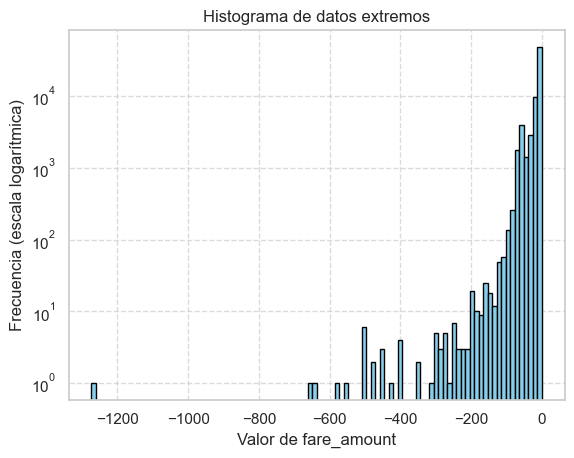

In [ ]:
# Crear un histograma con escala logarítmica en el eje y
plt.hist(datos_extremos['fare_amount'], bins=100, color='skyblue', edgecolor='black', log=True)
plt.title('Histograma de datos extremos')
plt.xlabel('Valor de fare_amount')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Filtrar los datos menores a cero y mayores a 800
datos_extremos_altos = fare_amount[(fare_amount['fare_amount'] > 800)]

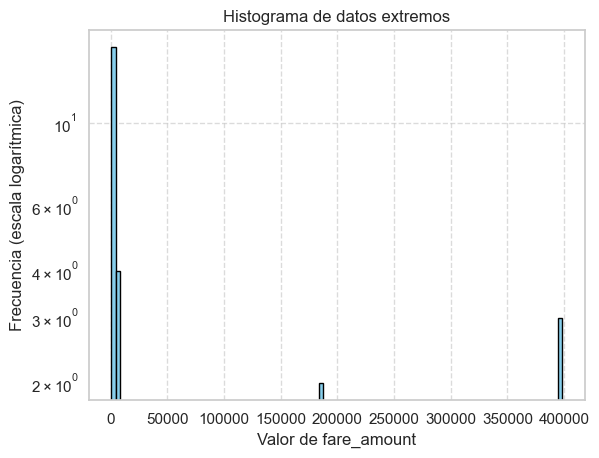

In [ ]:
# Crear un histograma con escala logarítmica en el eje y
plt.hist(datos_extremos_altos['fare_amount'], bins=100, color='skyblue', edgecolor='black', log=True)
plt.title('Histograma de datos extremos')
plt.xlabel('Valor de fare_amount')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Filtrar extremos totales
datos_extremos_muyaltos = yellow_taxis[(yellow_taxis['fare_amount'] > 100000)]
datos_extremos_muyaltos

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,trip_datatime
964853,1,2019-12-16 15:37:05,2019-12-16 15:51:05,1,0.0,1.0,236,237,4,398468.38,2.5,0.32,0.0,0.0,0.0,398471.20,2.5,NaN,NaN,0 days 00:14:00
5194775,1,2019-12-16 15:37:05,2019-12-16 15:51:05,1,0.0,1.0,236,237,4,398468.38,2.5,0.32,0.0,0.0,0.0,398471.20,2.5,NaN,NaN,0 days 00:14:00
9424697,1,2019-12-16 15:37:05,2019-12-16 15:51:05,1,0.0,1.0,236,237,4,398468.38,2.5,0.32,0.0,0.0,0.0,398471.20,2.5,NaN,NaN,0 days 00:14:00
12733327,1,2020-08-14 17:38:58,2020-08-14 17:44:14,1,0.8,1.0,142,48,3,187438.96,3.5,0.50,0.0,0.0,0.3,187443.26,2.5,NaN,NaN,0 days 00:05:16
17569170,1,2022-09-24 17:49:31,2022-09-24 17:59:06,1,3.5,1.0,233,232,4,187444.96,2.5,0.50,0.0,0.0,0.3,187448.26,2.5,0.0,NaN,0 days 00:09:35


Dos viajes de 14min y otros de menos de 10min. Cosidero error de carga y tomo valor cero para estos campos

In [16]:
# Filtrar los datos que cumplen con el filtro específico y establecer su valor en 0
filtro_muy_altos = yellow_taxis['fare_amount'] > 100000
yellow_taxis.loc[filtro_muy_altos, 'fare_amount'] = 0

In [17]:
yellow_taxis

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,trip_datatime
0,1,2019-04-18 08:20:22,2019-04-18 08:44:03,1,4.40,1.0,239,234,1,18.0,2.5,0.5,4.26,0.0,0.3,25.56,2.5,NaN,NaN,0 days 00:23:41
1,2,2019-04-15 21:21:29,2019-04-15 21:33:29,3,2.96,1.0,161,79,1,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5,NaN,NaN,0 days 00:12:00
2,2,2019-04-05 14:35:47,2019-04-05 14:46:15,3,0.96,1.0,114,125,1,8.0,0.0,0.5,2.82,0.0,0.3,14.12,2.5,NaN,NaN,0 days 00:10:28
3,2,2019-04-01 19:49:33,2019-04-01 19:54:02,1,0.91,1.0,239,238,1,5.5,1.0,0.5,1.96,0.0,0.3,11.76,2.5,NaN,NaN,0 days 00:04:29
4,1,2019-04-27 20:03:50,2019-04-27 20:14:37,1,1.50,1.0,68,142,2,9.0,3.0,0.5,0.00,0.0,0.3,12.80,2.5,NaN,NaN,0 days 00:10:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367104,2,2023-09-07 06:19:31,2023-09-07 06:31:44,1,2.07,1.0,186,162,1,12.8,0.0,0.5,5.04,0.0,1.0,21.84,2.5,NaN,0.0,0 days 00:12:13
19367105,2,2023-09-13 11:46:58,2023-09-13 11:56:04,1,1.06,1.0,140,236,1,10.0,0.0,0.5,2.80,0.0,1.0,16.80,2.5,NaN,0.0,0 days 00:09:06
19367106,2,2023-09-12 06:35:05,2023-09-12 06:41:13,1,1.49,1.0,239,236,1,9.3,0.0,0.5,2.00,0.0,1.0,15.30,2.5,NaN,0.0,0 days 00:06:08
19367107,2,2023-09-18 10:40:00,2023-09-18 10:52:59,2,1.67,1.0,75,151,2,13.5,0.0,0.5,0.00,0.0,1.0,15.00,0.0,NaN,0.0,0 days 00:12:59


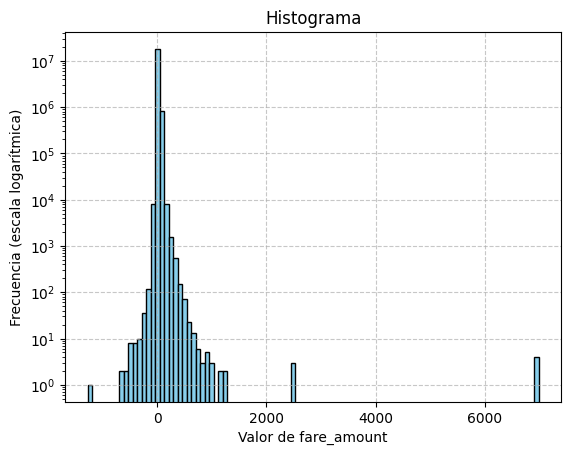

In [18]:
# Crear un histograma con escala logarítmica en el eje y
plt.hist(yellow_taxis['fare_amount'], bins=100, color='skyblue', edgecolor='black', log=True)
plt.title('Histograma')
plt.xlabel('Valor de fare_amount')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Columna Extra

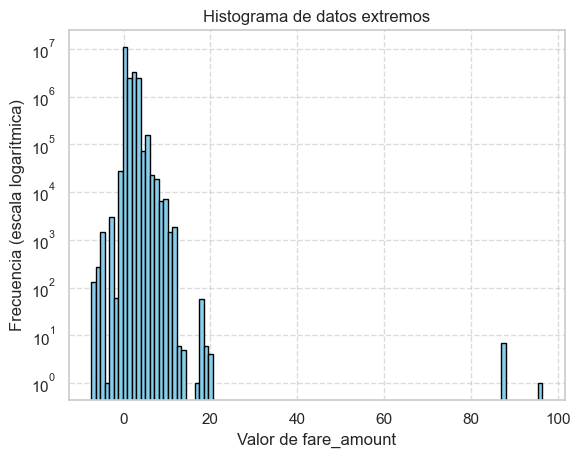

In [ ]:
# Crear un histograma con escala logarítmica en el eje y
plt.hist(yellow_taxis['extra'], bins=100, color='skyblue', edgecolor='black', log=True)
plt.title('Histograma de datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Columna MTA_tax <br>
Hay valores menores a 0

In [ ]:
mta = yellow_taxis[yellow_taxis['mta_tax'] < 0]

In [ ]:
mta

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,trip_datatime
3920,2,2019-04-10 22:02:30,2019-04-10 22:05:28,1.0,0.69,1.0,48,68,3,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8.3,-2.5,NaN,NaN,0 days 00:02:58
3929,2,2019-04-23 16:16:27,2019-04-23 16:16:52,1.0,0.01,1.0,170,170,2,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-6.8,-2.5,NaN,NaN,0 days 00:00:25
4419,2,2019-04-22 10:23:42,2019-04-22 10:24:17,1.0,0.00,1.0,193,193,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,0.0,NaN,NaN,0 days 00:00:35
4552,2,2019-04-07 10:09:09,2019-04-07 10:12:41,1.0,0.80,1.0,211,113,3,-5.0,0.0,-0.5,0.0,0.0,-0.3,-8.3,-2.5,NaN,NaN,0 days 00:03:32
5338,2,2019-04-23 13:54:01,2019-04-23 13:58:41,1.0,0.63,1.0,90,68,4,-5.0,0.0,-0.5,0.0,0.0,-0.3,-8.3,-2.5,NaN,NaN,0 days 00:04:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19366485,2,2023-09-02 20:12:55,2023-09-02 20:22:29,2.0,0.48,1.0,161,100,4,-9.3,-1.0,-0.5,0.0,0.0,-1.0,-14.3,-2.5,NaN,0.0,0 days 00:09:34
19366569,2,2023-09-11 00:23:13,2023-09-11 00:42:23,2.0,3.92,1.0,186,263,2,-21.2,-1.0,-0.5,0.0,0.0,-1.0,-26.2,-2.5,NaN,0.0,0 days 00:19:10
19366598,2,2023-09-26 05:20:36,2023-09-26 05:22:06,1.0,0.65,1.0,79,107,2,-5.1,-1.0,-0.5,0.0,0.0,-1.0,-10.1,-2.5,NaN,0.0,0 days 00:01:30
19366671,2,2023-09-02 23:18:46,2023-09-02 23:28:10,1.0,1.28,1.0,113,68,4,-10.0,-1.0,-0.5,0.0,0.0,-1.0,-15.0,-2.5,NaN,0.0,0 days 00:09:24


----

Columna improvement_surcharge <br>
Oscila entre -1 a 1

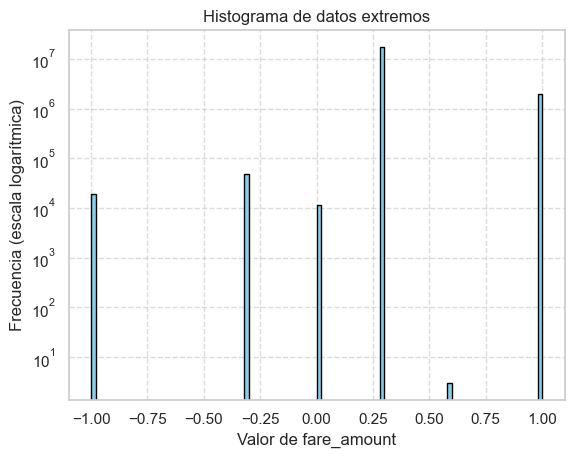

In [ ]:
# Crear un histograma con escala logarítmica en el eje y
plt.hist(yellow_taxis['improvement_surcharge'], bins=100, color='skyblue', edgecolor='black', log=True)
plt.title('Histograma de datos extremos')
plt.xlabel('Valor de fare_amount')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

---

Columna total_amount

In [20]:
total_amount_mayores = yellow_taxis['total_amount'] > 10000

total_amount_mayor = yellow_taxis[total_amount_mayores]
total_amount_mayor

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,trip_datatime
964853,1,2019-12-16 15:37:05,2019-12-16 15:51:05,1,0.0,1.0,236,237,4,0.0,2.5,0.32,0.0,0.0,0.0,398471.20,2.5,NaN,NaN,0 days 00:14:00
5194775,1,2019-12-16 15:37:05,2019-12-16 15:51:05,1,0.0,1.0,236,237,4,0.0,2.5,0.32,0.0,0.0,0.0,398471.20,2.5,NaN,NaN,0 days 00:14:00
9424697,1,2019-12-16 15:37:05,2019-12-16 15:51:05,1,0.0,1.0,236,237,4,0.0,2.5,0.32,0.0,0.0,0.0,398471.20,2.5,NaN,NaN,0 days 00:14:00
12733327,1,2020-08-14 17:38:58,2020-08-14 17:44:14,1,0.8,1.0,142,48,3,0.0,3.5,0.50,0.0,0.0,0.3,187443.26,2.5,NaN,NaN,0 days 00:05:16
17569170,1,2022-09-24 17:49:31,2022-09-24 17:59:06,1,3.5,1.0,233,232,4,0.0,2.5,0.50,0.0,0.0,0.3,187448.26,2.5,0.0,NaN,0 days 00:09:35


In [22]:
# Eliminar las filas que cumplen con el filtro
yellow_taxis = yellow_taxis.drop(yellow_taxis[total_amount_mayores].index)

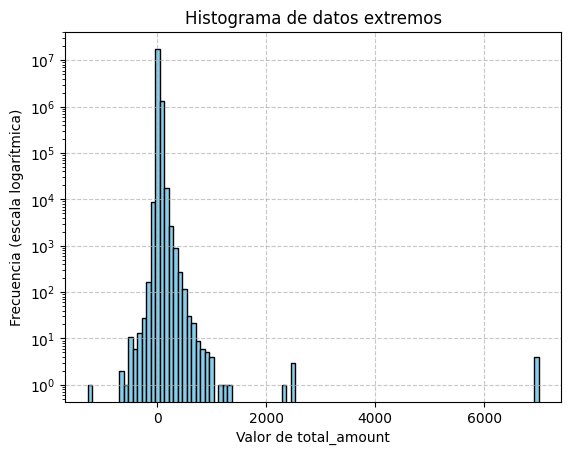

In [23]:
# Crear un histograma con escala logarítmica en el eje y
plt.hist(yellow_taxis['total_amount'], bins=100, color='skyblue', edgecolor='black', log=True)
plt.title('Histograma de datos extremos')
plt.xlabel('Valor de total_amount')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

----

Columna airport_fee and Airport_fee <br>
Las guado en una variable por si se tienen que usar y las borro de yellow taxis

In [26]:
airport_fee = yellow_taxis[['tpep_dropoff_datetime','airport_fee', 'Airport_fee']]

In [28]:
yellow_taxis.drop(['airport_fee', 'Airport_fee'], axis=1, inplace=True)

In [29]:
yellow_taxis.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'trip_datatime'],
      dtype='object')

In [30]:
yellow_taxis

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_datatime
0,1,2019-04-18 08:20:22,2019-04-18 08:44:03,1,4.40,1.0,239,234,1,18.0,2.5,0.5,4.26,0.0,0.3,25.56,2.5,0 days 00:23:41
1,2,2019-04-15 21:21:29,2019-04-15 21:33:29,3,2.96,1.0,161,79,1,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5,0 days 00:12:00
2,2,2019-04-05 14:35:47,2019-04-05 14:46:15,3,0.96,1.0,114,125,1,8.0,0.0,0.5,2.82,0.0,0.3,14.12,2.5,0 days 00:10:28
3,2,2019-04-01 19:49:33,2019-04-01 19:54:02,1,0.91,1.0,239,238,1,5.5,1.0,0.5,1.96,0.0,0.3,11.76,2.5,0 days 00:04:29
4,1,2019-04-27 20:03:50,2019-04-27 20:14:37,1,1.50,1.0,68,142,2,9.0,3.0,0.5,0.00,0.0,0.3,12.80,2.5,0 days 00:10:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367104,2,2023-09-07 06:19:31,2023-09-07 06:31:44,1,2.07,1.0,186,162,1,12.8,0.0,0.5,5.04,0.0,1.0,21.84,2.5,0 days 00:12:13
19367105,2,2023-09-13 11:46:58,2023-09-13 11:56:04,1,1.06,1.0,140,236,1,10.0,0.0,0.5,2.80,0.0,1.0,16.80,2.5,0 days 00:09:06
19367106,2,2023-09-12 06:35:05,2023-09-12 06:41:13,1,1.49,1.0,239,236,1,9.3,0.0,0.5,2.00,0.0,1.0,15.30,2.5,0 days 00:06:08
19367107,2,2023-09-18 10:40:00,2023-09-18 10:52:59,2,1.67,1.0,75,151,2,13.5,0.0,0.5,0.00,0.0,1.0,15.00,0.0,0 days 00:12:59


In [ ]:
# Dividir la columna tpep_pickup_datetime en fecha y hora
yellow_taxis['pickup_date'] = pd.to_datetime(yellow_taxis['tpep_pickup_datetime']).dt.date
yellow_taxis['pickup_time'] = pd.to_datetime(yellow_taxis['tpep_pickup_datetime']).dt.time

# Dividir la columna tpep_dropoff_datetime en fecha y hora
yellow_taxis['dropoff_date'] = pd.to_datetime(yellow_taxis['tpep_dropoff_datetime']).dt.date
yellow_taxis['dropoff_time'] = pd.to_datetime(yellow_taxis['tpep_dropoff_datetime']).dt.time

# Eliminar las columnas originales si así lo deseas
yellow_taxis.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)



---
---
---

Guardo el DataSet en CSV y Parquet

In [31]:
yellow_taxis.to_csv('Data/yellow_taxis_ELT.csv', index=False)  # index=False para evitar guardar el índice como una columna

yellow_taxis.to_parquet('Data/yellow_taxis_ETL.parquet', index=False)